# Demo - Uso de sklearn.  Aproximación y generalización

In [1]:
# En esta celda se definen los modulos que se van a usar en el notebook 
# También se configuran otros aspectos comunes a toda la práctica

import os
import numpy as np
import pandas as pd
from scipy.fft import fft, fftshift, ifft, fftfreq
from scipy.signal import spectrogram
import matplotlib.pyplot as plt


#estilo de las gráficas
plt.style.use('ggplot')

# FORMAS DE VER LAS GRAFICAS --------------------
# ELEGIR UNA DE LAS OPCIONES Y DES-COMENTAR (sacar # de la linea)
# ----------------
# a) graficas en línea  entre las celdas (no interactivo)
# %matplotlib inline
# ---------------- 
# b) graficas en línea  entre las celdas con pan/zoom
#  %matplotlib notebook
# ----------------
# c) graficas en ventanas externas (abre una ventana por cada figura)
# %matplotlib
# ----------------
# d) Si se usa "jupyter lab" en lugar de "jupyter notebook" usar %matplotlib widget en lugar de %matplotlib notebook 
#    Si se usa vscode usar también %matplotlib widget en lugar de %matplotlib notebook
# requiere instalar el modulo "ipympl". Ver https://stackoverflow.com/questions/51922480/javascript-error-ipython-is-not-defined-in-jupyterlab#56416229
%matplotlib widget
#---------------------------------------------------

## Uso de sklearn

En este ejemplo suponemos que tenemos un conjunto de datos al cual ajustaremos una recta mediante regresión lineal.



In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

### Generación de datos
Para esta prueba los datos los vamos a generar en forma artificial a mano pero se podría usar **sklearn** que tiene algunos datasets de prueba y también generadores de datos en el [módulo "datasets"](https://scikit-learn.org/stable/datasets.html)   
Ver [sklearn.datasets.make_regression](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html#sklearn.datasets.make_regression) 




#### Generación de datos de prueba con sklearn

In [3]:
cantidad_de_muestras = 100
cantidad_de_features = 1  
ruido = 10
bias = 30

X, y = make_regression(n_samples=cantidad_de_muestras, n_features=cantidad_de_features, 
                       bias=bias, noise=ruido, random_state=42)

Text(0.5, 1.0, 'Datos generados')

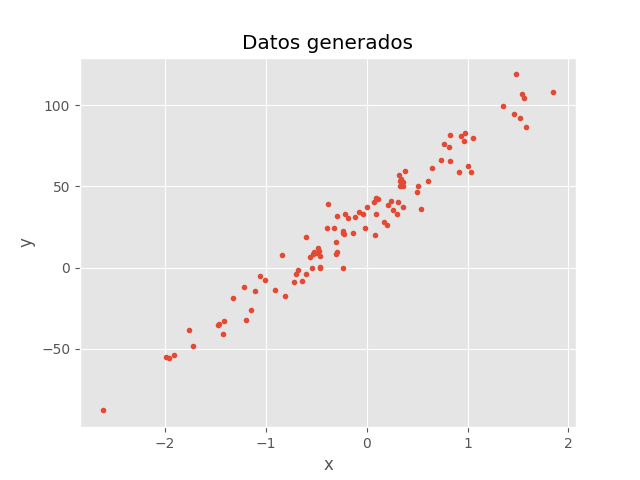

In [4]:
plt.figure()
plt.plot(X,y,'.')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Datos generados')

#### Generación de datos de prueba a mano

Los datos corresponden a una recta pero tienen ruido agregado.  


In [5]:
np.random.seed(42) # para que sea reproducible
m = 100 # cantdad de datos 
# coeficientes de la recta
corte_con_y = 4
pendiente = 3


def f(X, corte_con_y, pendiente):
    return corte_con_y + pendiente * X 


X = 2 * np.random.rand(m, 1) # X son muestras uniformes en [0,2]
y = f(X,corte_con_y, pendiente) + np.random.randn(m, 1) # y = f(x) + ruido gausianno (0,1)

Text(0.5, 1.0, 'Datos generados')

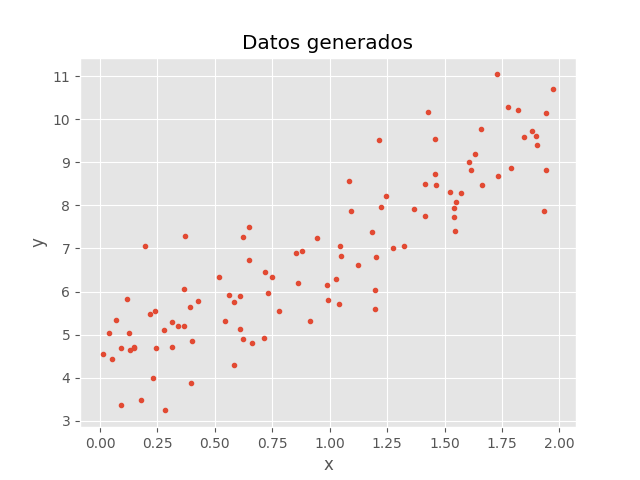

In [6]:
plt.figure()
plt.plot(X,y,'.')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Datos generados')

### Partición de los datos en entrenamiento y test
Usaremos la función [sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split)



In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 10 , random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(10, 1) (90, 1) (10, 1) (90, 1)



### Regresión
Para el ajuste lineal usaremos [sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)

In [8]:
# Inicializamos un modelo de regresión lineal 
model = LinearRegression()

# entrenamiento -> ajustamos el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# una vez ajustado vemos los parámetros obtenidos

print('Valores reales------------------')
print('Corte con el eje y:', corte_con_y)
print('Pendiente de la recta:', pendiente)

print('Predicciion---------------------')
print('Corte con el eje y:', model.intercept_)
print('Pendiente de la recta:', model.coef_)


Valores reales------------------
Corte con el eje y: 4
Pendiente de la recta: 3
Predicciion---------------------
Corte con el eje y: [2.69224545]
Pendiente de la recta: [[4.17366396]]


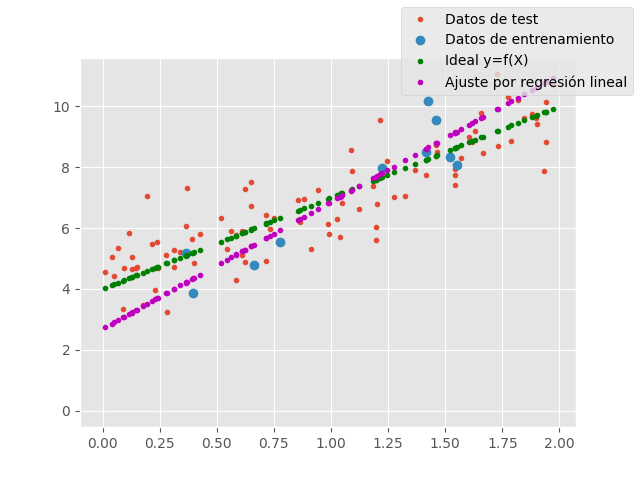

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(X_test, y_test , '.', label='Datos de test')
ax.plot(X_train, y_train , 'o', label='Datos de entrenamiento')    
ax.plot(X, f(X, corte_con_y, pendiente) , '.g', label='Ideal y=f(X)')
ax.plot(X, model.predict(X) , '.m', label='Ajuste por regresión lineal')    
#axs[0].set_ylim([-2, 2])
fig.legend()

y_pred_test = model.predict(X_test)
for i, xx in enumerate(X_test):
    ax.plot(xx,)

## Ejemplo sinusoidal de la presentación de la clase 2

El modelo real es sinusoidal y le ajustamos polinomios de distinto orden:  
* Orden 0: Una función constante
* Orden 1: Una recta
* Orden >=2: 

### Datos

y = sin(x) + ruido

In [10]:
# Generate data
N=1000
np.random.seed(0)

x = np.random.rand(N) * 2*np.pi
y = np.sin(x) + np.random.normal(0, 0.1, N)

# Reshape x to be a column vector
x = x.reshape(-1, 1)

### Ajuste lineal y polinomial

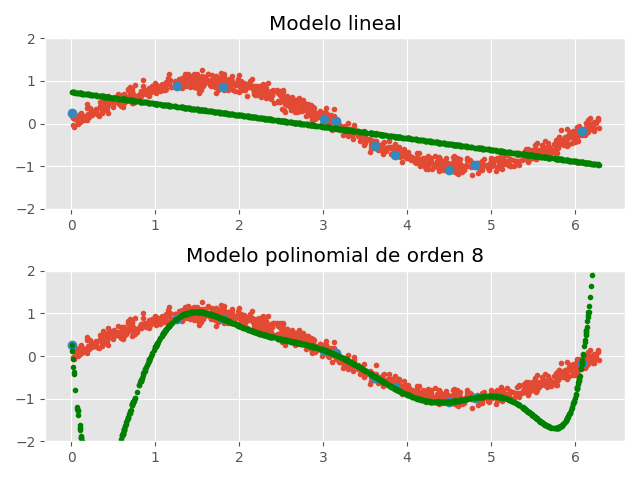

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures


polynomial_degree = 8

linear_model = LinearRegression()
polynomial_model = make_pipeline(PolynomialFeatures(degree=polynomial_degree), LinearRegression())


muestras_de_entrenamiento = 10

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=muestras_de_entrenamiento)

# Fit
linear_model.fit(x_train, y_train)
polynomial_model.fit(x_train, y_train)



# Create a figure and two subplots
fig, axs = plt.subplots(2)

# Plot on the first subplot
axs[0].plot(x_test, y_test , '.', label='Fuera de muestra')
axs[0].plot(x_train, y_train , 'o', label='Dentro de muestra')    
axs[0].plot(x, linear_model.predict(x) , '.g', label='Ajuste por modelo lineal')    
axs[0].set_ylim([-2, 2])

axs[0].set_title('Modelo lineal')

# Plot on the second subplot
axs[1].plot(x_test, y_test , '.', label='Fuera de muestra')
axs[1].plot(x_train, y_train , 'o', label='Dentro de muestra') 
axs[1].plot(x, polynomial_model.predict(x) , '.g', label='Ajuste por modelo lineal')    
axs[1].set_title(f'Modelo polinomial de orden {polynomial_degree}')
axs[1].set_ylim([-2, 2])

# Adjust layout
plt.tight_layout()




## Curvas de Ein y Eout vs la cantidad de muestras de entrenamiento 

### Datos
Lo mismo de antes pero con más muestras

In [12]:
# Generate data
N=10000
np.random.seed(0)
#x = np.linspace(0, 2*np.pi, N)
x = np.random.rand(N) * 2*np.pi
y = np.sin(x) + np.random.normal(0, 0.1, N)

# Reshape x to be a column vector
x = x.reshape(-1, 1)

### Curvas de error

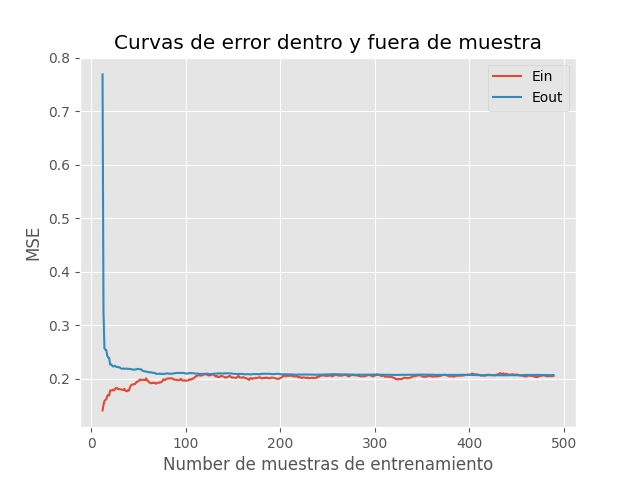

In [13]:
polynomial_degree = 1
polynomial_model = make_pipeline(PolynomialFeatures(degree=polynomial_degree), LinearRegression())


# Initialize arrays to store train and test scores
train_scores = []
test_scores = []

# Incremental train-test split and model fitting
rango = range(2, 500, 1)
for n in rango:
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=n)
    
    # Fit
    polynomial_model.fit(x_train, y_train)
    
    
    # Predict
    y_train_pred = polynomial_model.predict(x_train)
    y_test_pred = polynomial_model.predict(x_test)
    
    # Calculate scores
    train_score = mean_squared_error(y_train, y_train_pred)
    test_score = mean_squared_error(y_test, y_test_pred)
    
    # Append scores to lists
    train_scores.append(train_score)
    test_scores.append(test_score)




# suavizado de los scores para visualización
window_size = 20
train_scores_mean = np.convolve(train_scores, np.ones(window_size)/window_size, mode='same')
test_scores_mean = np.convolve(test_scores, np.ones(window_size)/window_size, mode='same')

# Plot
plt.figure()
#plt.plot(rango, train_scores, label='Ein')
#plt.plot(rango, test_scores, label='Eout')
plt.plot(rango[window_size//2:-window_size//2], train_scores_mean[window_size//2:-window_size//2], label='Ein')
plt.plot(rango[window_size//2:-window_size//2], test_scores_mean[window_size//2:-window_size//2], label='Eout')

# ax = plt.gca()
# ax.set_ylim([0, .2])

plt.xlabel('Número de muestras de entrenamiento')
plt.ylabel('MSE')
plt.title('Curvas de error dentro y fuera de muestra')
plt.legend()
plt.show()